In [413]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [414]:
dataset=pd.read_csv('winequality-white.csv')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [415]:
dataset['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [416]:
dataset=dataset[dataset.quality !=3]
dataset=dataset[dataset.quality !=9]
dataset=dataset.reset_index(drop=True)


In [417]:
dataset['quality'].value_counts()
dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4869,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4870,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4871,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [418]:
import sklearn
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score


In [419]:
# stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset, dataset["quality"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]


In [420]:
# Extract train and test features/labels

X=pd.DataFrame(dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
y=dataset.quality

X_train=pd.DataFrame(strat_train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
X_test=pd.DataFrame(strat_test_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

y_train=strat_train_set.quality
y_test=strat_test_set.quality


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test=pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [421]:
svm_clf = svm.SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)
print('Test set score is', svm_clf.score(X_test, y_test))
print('Training set score is', svm_clf.score(X_train, y_train))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.5702564102564103
Training set score is 0.6231400718317086
[[  3  18  12   0   0]
 [  0 165 126   0   0]
 [  0  81 346  13   0]
 [  0   2 128  46   0]
 [  0   0  26   9   0]]


In [449]:
#Classifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score


forest_class = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_class.fit(X_train, y_train)

# Predicting the Test set results
y_pred = forest_class.predict(X_test)
print('Test set score is', forest_class.score(X_test, y_test))
print('Training set score is', forest_class.score(X_train, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
print('The precision score of the test set is', precision_score(y_test, y_pred, average="macro"))
print('The recall score of the test set is', recall_score(y_test, y_pred, average="macro"))



# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)


Test set score is 0.6030769230769231
Training set score is 0.9851205746536685
The f1_score of the test set is 0.527700447137698
The precision score of the test set is 0.6124381432786619
The recall score of the test set is 0.4856704378096131
[[ 10  18   5   0   0]
 [  5 184  99   3   0]
 [  2  89 306  42   1]
 [  0  10  86  75   5]
 [  0   1  11  10  13]]


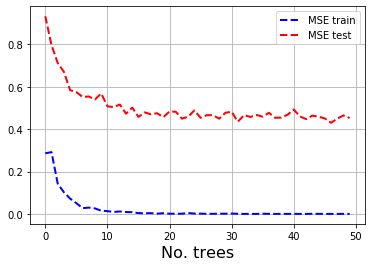

<Figure size 576x288 with 0 Axes>

In [423]:
rf = RandomForestClassifier(n_estimators=1)
mse_train_vec=np.zeros((50,1))
mse_test_vec=np.zeros((50,1))


for iter in range(50):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train_vec[iter] = mean_squared_error(y_train, y_train_predicted)
    mse_test_vec[iter] = mean_squared_error(y_test, y_test_predicted)
    rf.n_estimators += 1
    
plt.plot(range(50), mse_train_vec, "b--", label="MSE train", linewidth=2)
plt.plot(range(50), mse_test_vec, "r--", label="MSE test", linewidth=2)
plt.legend()
plt.xlabel("No. trees", fontsize=16)       
plt.grid(True)                              
plt.figure(figsize=(8, 4))                      
plt.show()

In [424]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 11], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 11],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=...
                          'max_features': [2, 4, 8, 11],
                          'min_samples_leaf': [1, 5, 1

In [425]:
print(grid_search.best_params_)
print(grid_search.param_grid)

{'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 11], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 11], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}]


In [426]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7966708564808501 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.7874398834424859 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.783356894798287 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.7987612266366214 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
0.7874398834424859 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
0.7885793319318788 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
0.796831848875437 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 5}
0.7802395338086947 {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
0.7807325762173354 {'max_de

In [427]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [428]:
# see them close to their name
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = list(X_train)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.13302293272936622, 'alcohol'),
 (0.1073909015610371, 'density'),
 (0.09811008465250301, 'volatile acidity'),
 (0.09595386782147114, 'free sulfur dioxide'),
 (0.09236089502635617, 'total sulfur dioxide'),
 (0.08754826858593179, 'residual sugar'),
 (0.08090125454519456, 'citric acid'),
 (0.08012589099828268, 'pH'),
 (0.07720337808083752, 'chlorides'),
 (0.07418412501954812, 'sulphates'),
 (0.07319840097947164, 'fixed acidity')]

In [456]:
final_model = grid_search.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_test)
print('Test set score is', final_model.score(X_test, y_test))
print('Training set score is', final_model.score(X_train, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
print('The precision score of the test set is', precision_score(y_test, y_pred, average="macro"))
print('The recall score of the test set is', recall_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.6461538461538462
Training set score is 0.9917906618778861
The f1_score of the test set is 0.554814415980419
The precision score of the test set is 0.6889842476210001
The recall score of the test set is 0.5029326772883473
[[  8  17   7   1   0]
 [  2 190  95   3   1]
 [  1  69 339  31   0]
 [  0   5  89  79   3]
 [  0   0  11  10  14]]


In [430]:
X_train_drop=pd.DataFrame(strat_train_set[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH']])
X_test_drop=pd.DataFrame(strat_test_set[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH']])

y_train=strat_train_set.quality
y_test=strat_test_set.quality


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_drop=pd.DataFrame(StandardScaler().fit_transform(X_train_drop), columns=X_train_drop.columns, index=X_train_drop.index)
X_test_drop=pd.DataFrame(StandardScaler().fit_transform(X_test_drop), columns=X_test_drop.columns, index=X_test_drop.index)

In [431]:
param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4, 7], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 7],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search_drop = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan)
grid_search_drop.fit(X_train_drop, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=...
             param_grid=[{'max_depth': [5, 10, 15], 'max_features': [2, 4, 7],
                          'min_s

In [432]:
print(grid_search_drop.best_params_)
print(grid_search_drop.param_grid)

feature_importances = grid_search_drop.best_estimator_.feature_importances_
attributes = list(X_train_drop)
sorted(zip(feature_importances, attributes), reverse=True)

{'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 7], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 7], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}]


[(0.17646664601714007, 'density'),
 (0.15116530186007737, 'total sulfur dioxide'),
 (0.14697278278103393, 'volatile acidity'),
 (0.14276947662258727, 'chlorides'),
 (0.13446045107314397, 'pH'),
 (0.12954022854252037, 'citric acid'),
 (0.11862511310349708, 'fixed acidity')]

In [457]:
final_model = grid_search_drop.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_test_drop)
print('Test set score is', final_model.score(X_test_drop, y_test))
print('Training set score is', final_model.score(X_train_drop, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
print('The precision score of the test set is', precision_score(y_test, y_pred, average="macro"))
print('The recall score of the test set is', recall_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.6041025641025641
Training set score is 0.986659825551565
The f1_score of the test set is 0.4897028689265356
The precision score of the test set is 0.6554780004645544
The recall score of the test set is 0.44249899584951125
[[  5  13  13   2   0]
 [  3 176 106   6   0]
 [  1  78 320  40   1]
 [  0   4  94  78   0]
 [  0   3  15   7  10]]


In [434]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_train)
X_train_PC = pd.DataFrame(data = principalComponents)
X_test_PC = pca.transform(X_test)

In [435]:
X_train_PC

,0,1,2,3,4,5,6,7,8
0,-0.910053,-0.343303,-0.827503,0.316704,-0.023302,0.733540,0.217060,0.330187,-1.042124
1,-0.898946,2.117210,0.544159,-1.537058,0.321523,-0.953273,0.238315,0.173996,1.050635
2,0.166778,-1.459801,0.005087,1.155330,1.375460,0.576159,0.611965,0.372905,0.930712
3,-2.378798,0.163823,0.224456,-0.770752,-0.897109,-0.766884,-0.154888,-0.528238,0.410952
4,-2.525477,1.643357,-1.027254,-0.292886,0.778754,0.269925,0.065529,-0.637326,-0.082690
...,...,...,...,...,...,...,...,...,...
3893,-2.618945,-1.034484,-0.157637,-0.884603,-0.593040,-0.622796,1.197132,-0.303622,0.624928
3894,-2.281334,-0.435291,-0.808113,0.731525,1.253962,0.504785,-0.325030,-0.571537,-0.097876
3895,-1.799064,0.384646,1.540701,0.047912,-0.033038,-1.343438,0.645274,0.049931,-0.119736
3896,0.541238,0.635530,-0.899221,-0.186322,-0.041083,-0.855694,-1.286225,1.352683,0.000096


In [436]:
param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4, 9], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4,9],'min_samples_split':[2,5,10],'max_depth':[5,10,15],'min_samples_leaf':[1,5,10]}
  ]

grid_search_PC = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan)
grid_search_PC.fit(X_train_PC, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=...
             param_grid=[{'max_depth': [5, 10, 15], 'max_features': [2, 4, 9],
                          'min_s

In [458]:
print(grid_search_PC.best_params_)
print(grid_search_PC.param_grid)

final_model = grid_search_PC.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_test_PC)
print('Test set score is', final_model.score(X_test_PC, y_test))
print('Training set score is', final_model.score(X_train_PC, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
print('The precision score of the test set is', precision_score(y_test, y_pred, average="macro"))
print('The recall score of the test set is', recall_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

{'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 9], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 9], 'min_samples_split': [2, 5, 10], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 5, 10]}]
Test set score is 0.5907692307692308
Training set score is 0.9733196511031298
The f1_score of the test set is 0.42370628832138746
The precision score of the test set is 0.5912466924564972
The recall score of the test set is 0.3926607756504664
[[  3  18  12   0   0]
 [  1 166 120   4   0]
 [  1  77 330  31   1]
 [  0   5  96  72   3]
 [  0   1  17  12   5]]


In [438]:
from sklearn.base import BaseEstimator, TransformerMixin
# 
# column index
facid_idx, vacid_idx, cacid_idx, frees_idx, totals_idx = 0, 1, 2, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        SO2_ratio = X.iloc[:, frees_idx] / X.iloc[:, totals_idx]
        citric_ratio = X.iloc[:, cacid_idx] / X.iloc[:, facid_idx]
        temp=np.c_[X, SO2_ratio, citric_ratio]
        return pd.DataFrame(temp,columns=list(X.columns)+["SO2_ratio", "citric_ratio"],index=X.index)


attr_adder = CombinedAttributesAdder()
X_extra_attr = attr_adder.transform(X)

In [439]:
X_extra_attr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,SO2_ratio,citric_ratio
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0.264706,0.051429
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0.106061,0.053968
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0.309278,0.049383
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.252688,0.044444
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.252688,0.044444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.260870,0.046774
4869,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.339286,0.054545
4870,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.270270,0.029231
4871,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.181818,0.054545


In [440]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
dataset_extra_attr=pd.DataFrame(np.c_[X_extra_attr,y],columns=list(X_extra_attr.columns)+["quality"],index=X_extra_attr.index)
dataset_extra_attr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,SO2_ratio,citric_ratio,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0.264706,0.051429,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0.106061,0.053968,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0.309278,0.049383,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.252688,0.044444,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.252688,0.044444,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.260870,0.046774,6.0
4869,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.339286,0.054545,5.0
4870,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.270270,0.029231,6.0
4871,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.181818,0.054545,7.0


In [441]:
for train_index, test_index in split.split(dataset_extra_attr, dataset_extra_attr["quality"]):
    strat_extra_attr_train_set = dataset_extra_attr.loc[train_index]
    strat_extra_attr_test_set = dataset_extra_attr.loc[test_index]

X_extra_attr_train=pd.DataFrame(strat_extra_attr_train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','SO2_ratio','citric_ratio']])
X_extra_attr_test=pd.DataFrame(strat_extra_attr_test_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','SO2_ratio','citric_ratio']])

y_train=strat_extra_attr_train_set.quality
y_test=strat_extra_attr_test_set.quality


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_extra_attr_train=pd.DataFrame(StandardScaler().fit_transform(X_extra_attr_train), columns=X_extra_attr_train.columns, index=X_extra_attr_train.index)
X_extra_attr_test=pd.DataFrame(StandardScaler().fit_transform(X_extra_attr_test), columns=X_extra_attr_test.columns, index=X_extra_attr_test.index)

In [442]:
param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 13], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 13],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search_extra_atrr = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan)
grid_search_extra_atrr.fit(X_extra_attr_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=...
                          'max_features': [2, 4, 8, 13],
                          'min_samples_leaf': [1, 5, 1

In [443]:
print(grid_search_extra_atrr.best_params_)
print(grid_search_extra_atrr.param_grid)

feature_importances = grid_search_extra_atrr.best_estimator_.feature_importances_
attributes = list(X_extra_attr_train)
sorted(zip(feature_importances, attributes), reverse=True)

{'bootstrap': False, 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 13], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 13], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}]


[(0.11250104891371682, 'alcohol'),
 (0.09631901302443233, 'density'),
 (0.08354162914518946, 'SO2_ratio'),
 (0.08320504407841091, 'volatile acidity'),
 (0.07896610413084179, 'chlorides'),
 (0.07624112086230203, 'total sulfur dioxide'),
 (0.07269541474930138, 'free sulfur dioxide'),
 (0.07257208375202442, 'residual sugar'),
 (0.07190686612342226, 'citric_ratio'),
 (0.06542782729972225, 'pH'),
 (0.0635113954589399, 'citric acid'),
 (0.06265036004745547, 'sulphates'),
 (0.06046209241424096, 'fixed acidity')]

In [459]:
print(grid_search_extra_atrr.best_params_)
print(grid_search_extra_atrr.param_grid)

final_model = grid_search_extra_atrr.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_extra_attr_test)
print('Test set score is', final_model.score(X_extra_attr_test, y_test))
print('Training set score is', final_model.score(X_extra_attr_train, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
print('The precision score of the test set is', precision_score(y_test, y_pred, average="macro"))
print('The recall score of the test set is', recall_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

{'bootstrap': False, 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 13], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 13], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}]
Test set score is 0.64
Training set score is 0.9992303745510518
The f1_score of the test set is 0.5673073821375487
The precision score of the test set is 0.6826700692684283
The recall score of the test set is 0.5136680501628955
[[ 10  14   8   1   0]
 [  5 180 104   2   0]
 [  2  63 341  33   1]
 [  0   4  93  78   1]
 [  0   1  12   7  15]]


In [445]:
X_extra_attr_train_drop=pd.DataFrame(strat_extra_attr_train_set[['volatile acidity','chlorides','density','alcohol','SO2_ratio']])
X_extra_attr_test_drop=pd.DataFrame(strat_extra_attr_test_set[['volatile acidity','chlorides','density','alcohol','SO2_ratio']])

y_train=strat_extra_attr_train_set.quality
y_test=strat_extra_attr_test_set.quality


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_extra_attr_train_drop=pd.DataFrame(StandardScaler().fit_transform(X_extra_attr_train_drop), columns=X_extra_attr_train_drop.columns, index=X_extra_attr_train_drop.index)
X_extra_attr_test_drop=pd.DataFrame(StandardScaler().fit_transform(X_extra_attr_test_drop), columns=X_extra_attr_test_drop.columns, index=X_extra_attr_test_drop.index)

In [446]:
param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4,5], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 5],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search_extra_atrr_drop = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan)
grid_search_extra_atrr_drop.fit(X_extra_attr_train_drop, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=...
             param_grid=[{'max_depth': [5, 10, 15], 'max_features': [2, 4, 5],
                          'min_s

In [447]:
print(grid_search_extra_atrr_drop.best_params_)
print(grid_search_extra_atrr_drop.param_grid)

feature_importances = grid_search_extra_atrr.best_estimator_.feature_importances_
attributes = list(X_extra_attr_train_drop)
sorted(zip(feature_importances, attributes), reverse=True)

{'bootstrap': False, 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 5], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 5], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}]


[(0.08320504407841091, 'chlorides'),
 (0.07896610413084179, 'SO2_ratio'),
 (0.07257208375202442, 'alcohol'),
 (0.0635113954589399, 'density'),
 (0.06046209241424096, 'volatile acidity')]

In [460]:
print(grid_search_extra_atrr_drop.best_params_)
print(grid_search_extra_atrr_drop.param_grid)

final_model = grid_search_extra_atrr_drop.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_extra_attr_test_drop)
print('Test set score is', final_model.score(X_extra_attr_test_drop, y_test))
print('Training set score is', final_model.score(X_extra_attr_train_drop, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
print('The precision score of the test set is', precision_score(y_test, y_pred, average="macro"))
print('The recall score of the test set is', recall_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

{'bootstrap': False, 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 5], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 5], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}]
Test set score is 0.5938461538461538
Training set score is 0.9540790148794254
The f1_score of the test set is 0.3969476079148958
The precision score of the test set is 0.5585158249679245
The recall score of the test set is 0.37769335475521043
[[  4  18  10   1   0]
 [  4 168 112   7   0]
 [  0  70 336  33   1]
 [  0   4 102  70   0]
 [  0   0  22  12   1]]
